**Author: Vishal Khatik**

**Organization: COGNORISE  INFOTECH**

**Domain: Data Analytics**

**Date: 01/08/2024 to 01/09/2024**

**CUSTOMER PERSONALITY ANALYSIS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv',sep ='\t')
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


**AttributeError:**

ID : Customer Unique  Identity

Year_Bith: Customer DOB

Education : Customer Education level

Martial_Status: Customer Martial status

Income: Customer Income

Kidhome: Number of children in customer 's household

Teenhome : Number of Teenagers in customer 's household

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0
otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Exploratory Data Analysis**

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.size

64960

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Detect the missing values**

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


<Axes: >

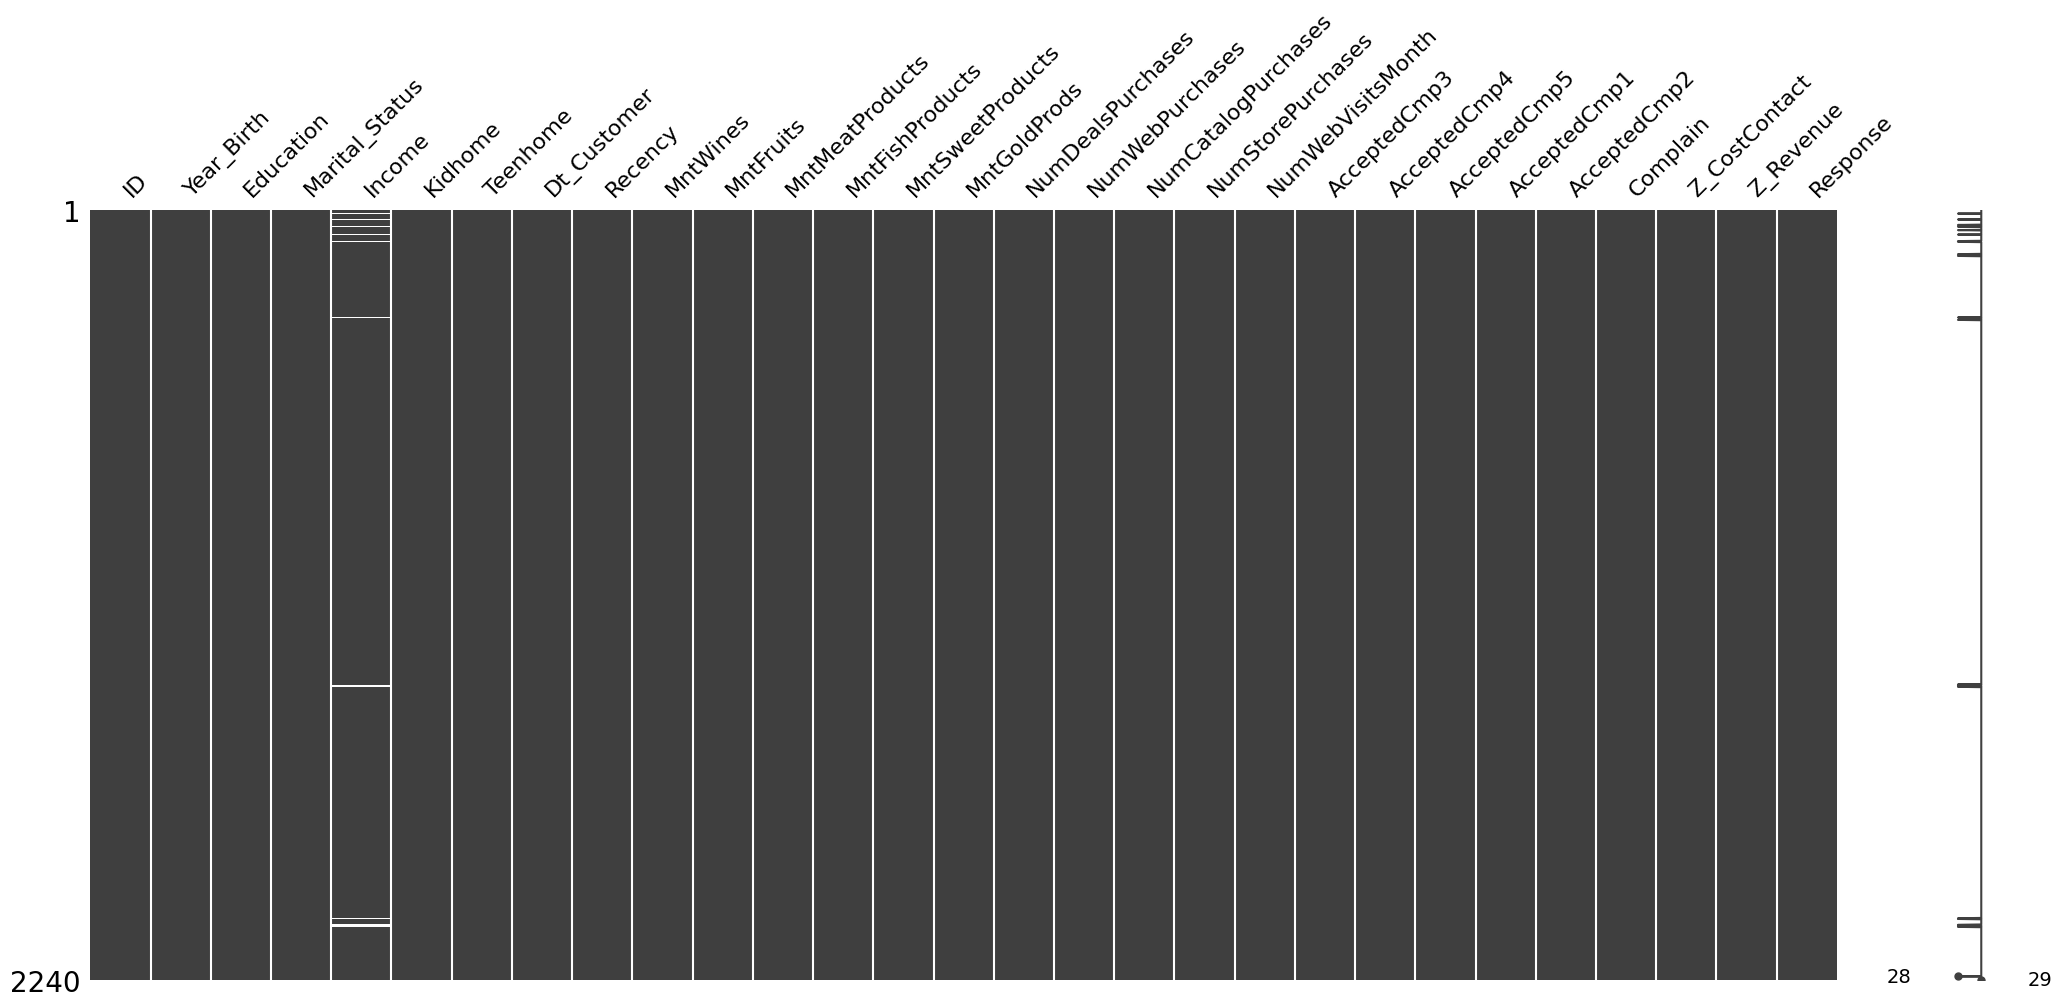

In [ ]:
# visualiza missing data
import missingno as mn

mn.matrix(df)

the income have nan value

In [ ]:
df['Income'].fillna(df['Income'].mean(),inplace = True)

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Detect Duplicate

In [ ]:
df.duplicated().sum()

0

There not Duplicat value in Data Set

In [ ]:
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1975
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


Drop Un use columns

In [ ]:
df.drop(columns = ['Z_CostContact','Z_Revenue'],inplace=True)

In [ ]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1


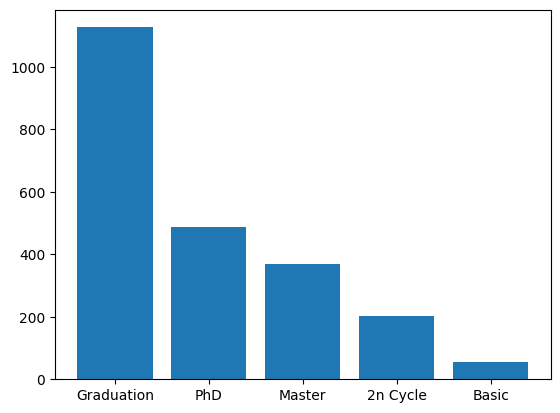

In [ ]:
plt.bar(df['Education'].value_counts().index,df['Education'].value_counts())
plt.show()

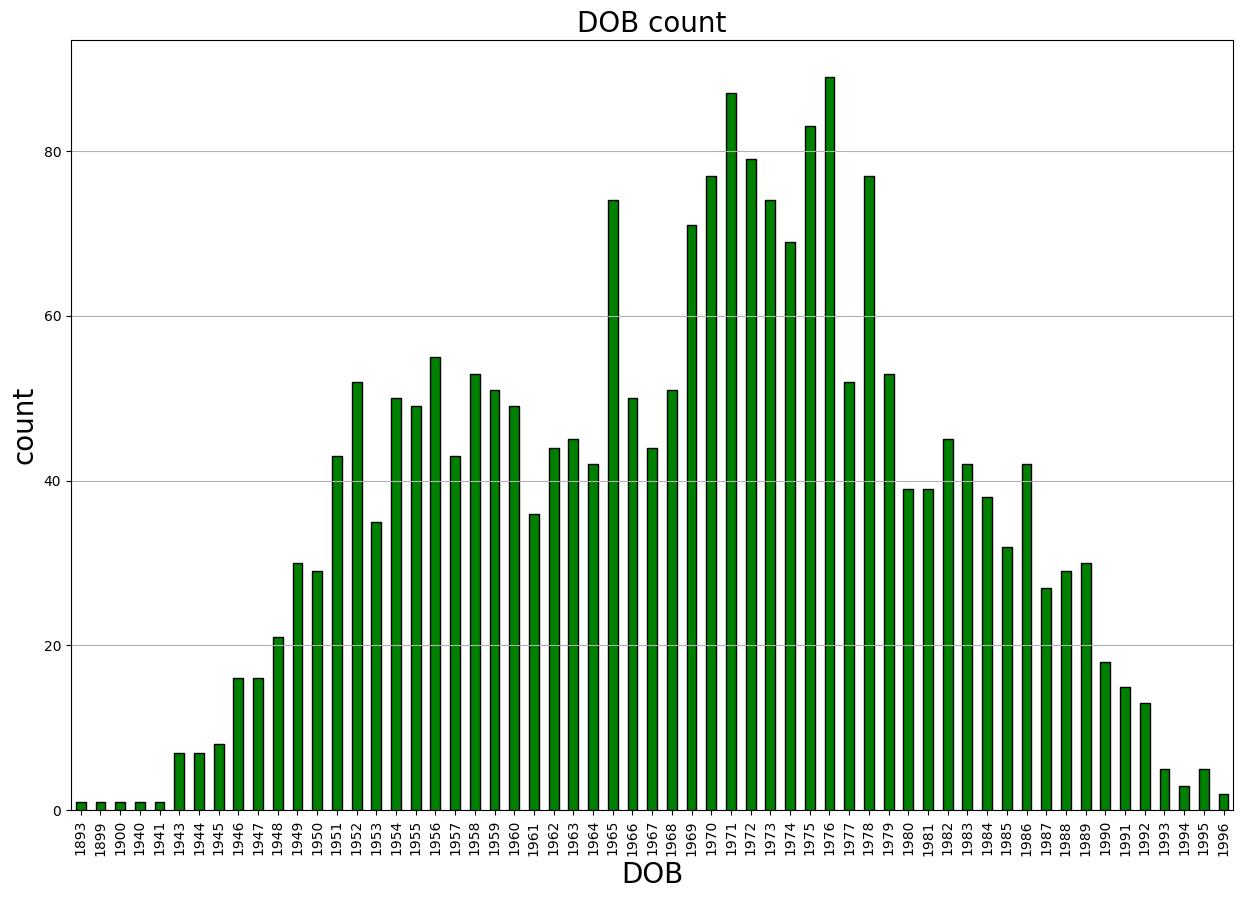

In [ ]:
y_b_r = df['Year_Birth'].value_counts().sort_index()

plt.figure(figsize = (15,10))
y_b_r.plot(kind = 'bar',color = 'green',edgecolor = 'black')
plt.xlabel('DOB',fontsize = 20)
plt.ylabel('count',fontdict={'fontsize':20})
plt.title('DOB count',fontsize = 20)
plt.xticks(rotation = 90)
#plt.yticks(rotation = 90)
plt.grid(axis = 'y')
plt.show()

In [ ]:
ed = df['Education'].value_counts()

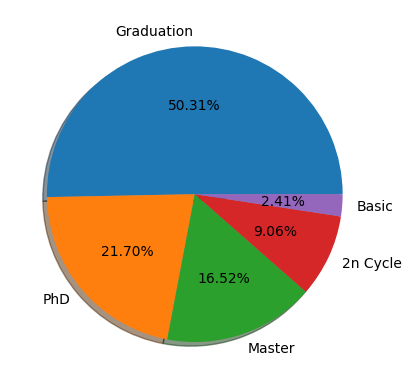

In [ ]:
plt.pie(ed,labels = ed.index,autopct = '%.2f%%',shadow=True)
plt.show()

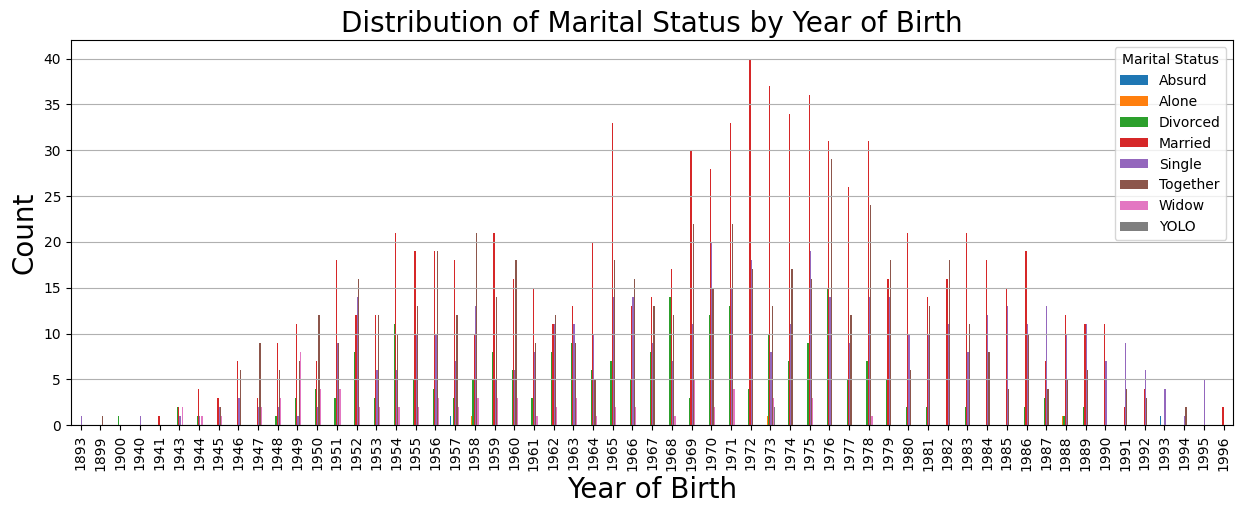

In [ ]:
# Assuming 'df' is your DataFrame

# Group the data by 'Year_Birth' and 'Marital_Status' and count occurrences
grouped_data = df.groupby(['Year_Birth', 'Marital_Status']).size().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Year of Birth', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Marital Status by Year of Birth', fontsize=20)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(title='Marital Status')
plt.show()

In [ ]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1


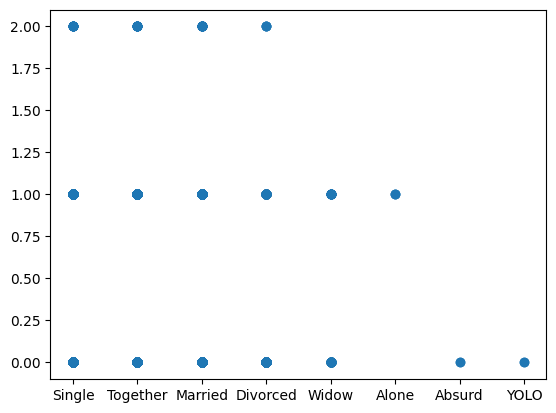

In [ ]:
plt.scatter(df['Marital_Status'],df['Kidhome'])
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Income'>

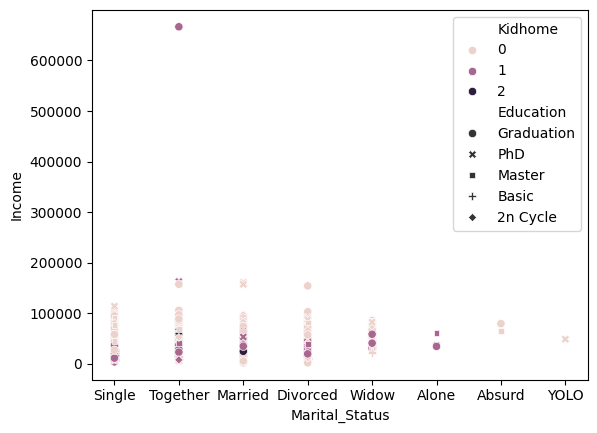

In [ ]:
sns.scatterplot(data=df, x="Marital_Status", y="Income", hue="Kidhome", style="Education")

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [ ]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1


<Axes: xlabel='Year_Birth', ylabel='Education'>

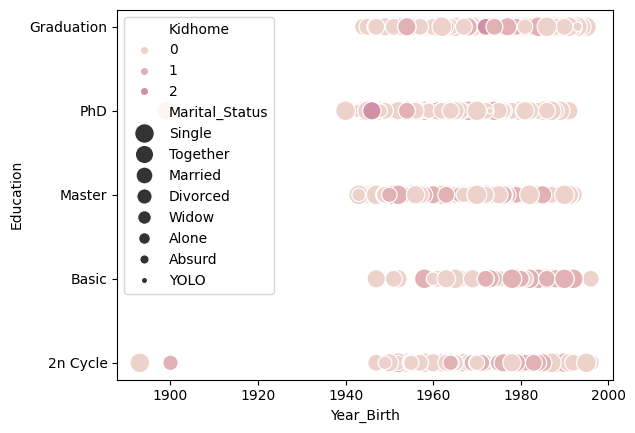

In [ ]:
sns.scatterplot(
    data=df, x="Year_Birth", y="Education", hue="Kidhome", size="Marital_Status",
    sizes=(20, 200), hue_norm=(0, 7), legend="full"
)

In [ ]:
import plotly.express as px
plt.figure(figsize = (5,2))
fig = px.scatter(df, x="Year_Birth", y="Income", color="Kidhome",
                 size='Kidhome', hover_data=['Kidhome'])
fig.show()

<Figure size 500x200 with 0 Axes>

In [ ]:
import plotly.express as px
plt.figure(figsize = (10,4))
fig = px.scatter(df, x="Year_Birth", y="Income", color='Marital_Status',
                 size='ID', hover_data=['Kidhome'])
fig.show()

<Figure size 1000x400 with 0 Axes>

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

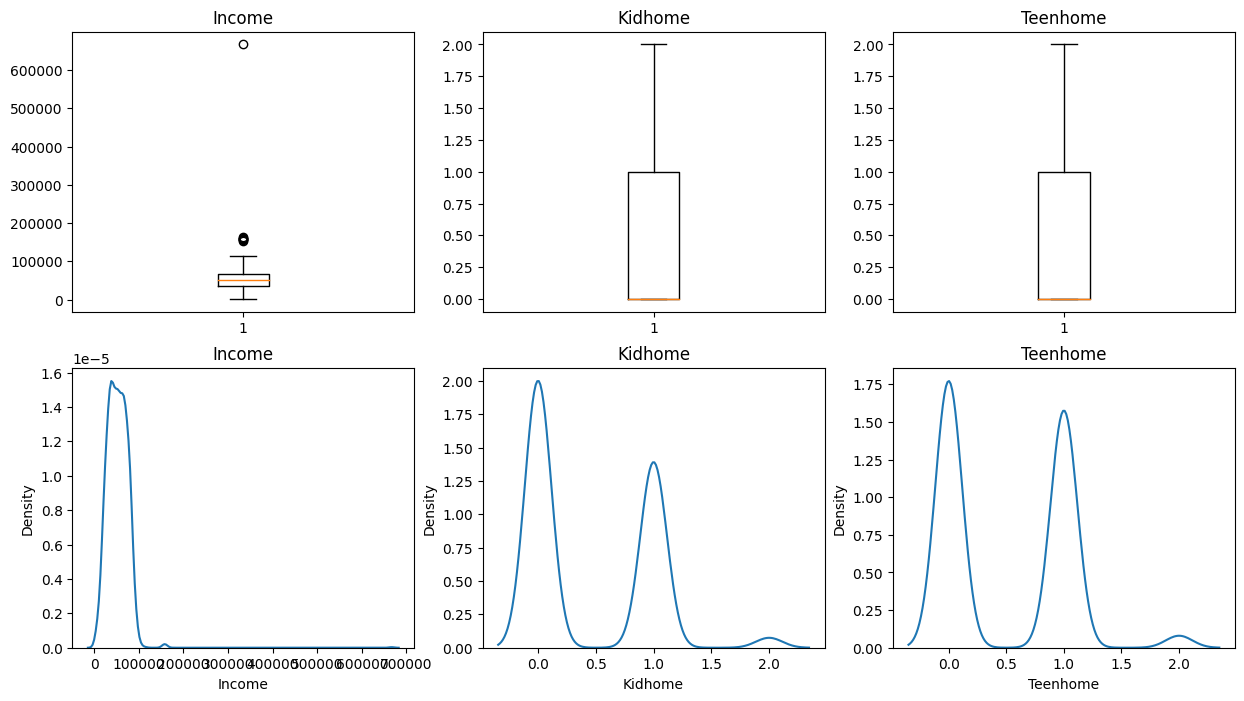

In [ ]:
plt.figure(figsize = (15,8))

plt.subplot(2,3,1)
plt.boxplot(df['Income'])
plt.title('Income')

plt.subplot(2,3,2)
plt.boxplot(df['Kidhome'])
plt.title('Kidhome')

plt.subplot(2,3,3)
plt.boxplot(df['Teenhome'])
plt.title('Teenhome')

plt.subplot(2,3,4)
sns.kdeplot(df['Income'])
plt.title('Income')

plt.subplot(2,3,5)
sns.kdeplot(df['Kidhome'])
plt.title('Kidhome')

plt.subplot(2,3,6)
sns.kdeplot(df['Teenhome'])
plt.title('Teenhome')

plt.show()


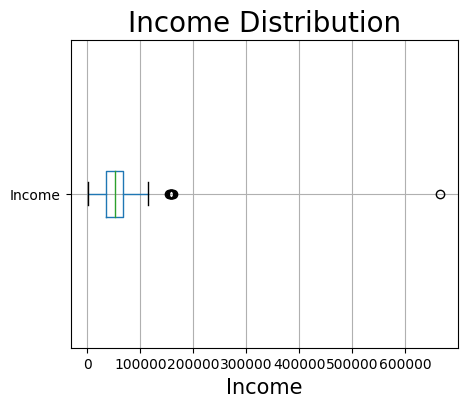

In [ ]:
plt.figure(figsize=(5, 4))
df.boxplot(column='Income', vert=False)
plt.title('Income Distribution', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.show()

In [ ]:
print(df['Kidhome'].value_counts())
print(df['Teenhome'].value_counts())

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64


In [ ]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

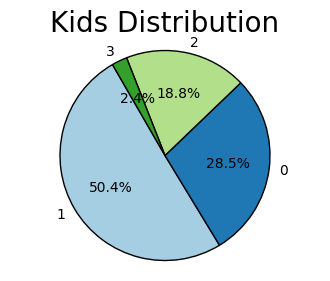

In [ ]:
plt.figure(figsize = (4,3))
df['Kids'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%',startangle = 120,
                               colors = plt.cm.Paired.colors, wedgeprops = {'edgecolor':'black'})
plt.title('Kids Distribution',fontsize = 20)
plt.ylabel('')
plt.axis('equal')
plt.show()

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids'],
      dtype='object')

In [ ]:
df['MntWines'].value_counts()

,count
MntWines,
2,42
5,40
1,37
6,37
4,33
...,...
806,1
61,1
986,1


In [ ]:
df['MntFruits'].value_counts()

,count
MntFruits,
0,400
1,162
2,120
3,116
4,104
...,...
164,1
130,1
189,1


In [ ]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']+ df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
df['Expenses'].describe()

,Expenses
count,2240.000000
mean,605.798214
std,602.249288
min,5.000000
25%,68.750000
50%,396.000000
75%,1045.500000
max,2525.000000


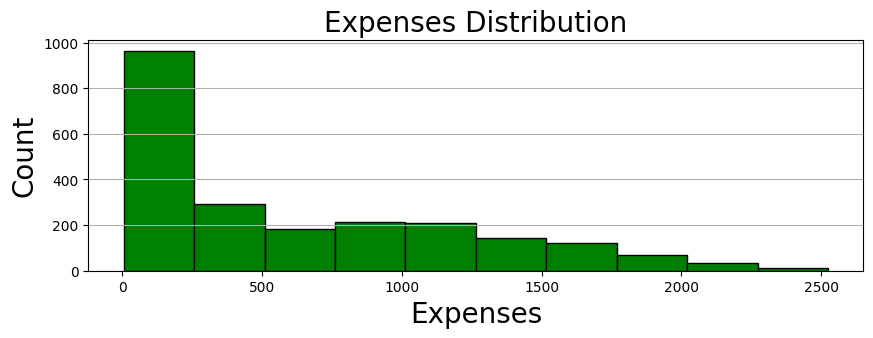

In [ ]:
plt.figure(figsize = (10,3))
df['Expenses'].plot(kind = 'hist',bins = 10,color = 'green',edgecolor = 'black')
plt.title('Expenses Distribution',fontsize = 20)
plt.xlabel('Expenses',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.grid(axis = 'y')
plt.show()

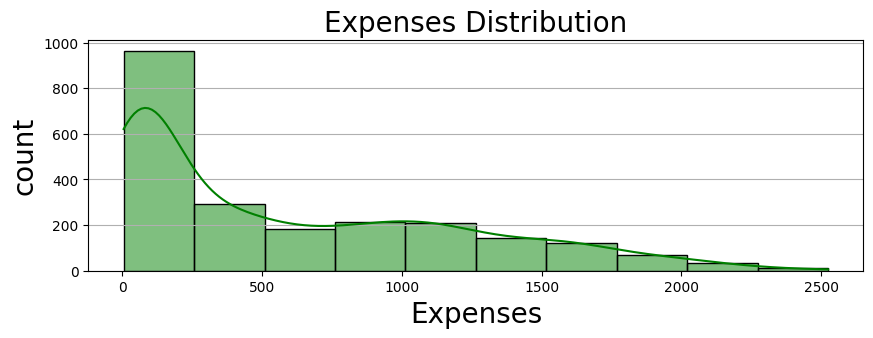

In [ ]:
plt.figure(figsize = (10,3))
sns.histplot(df['Expenses'],bins = 10,color = 'green',edgecolor = 'black',kde=True)
plt.title('Expenses Distribution',fontsize = 20)
plt.xlabel('Expenses',fontsize = 20)
plt.ylabel('count',fontsize =  20)
plt.grid(axis = 'y')
plt.show()

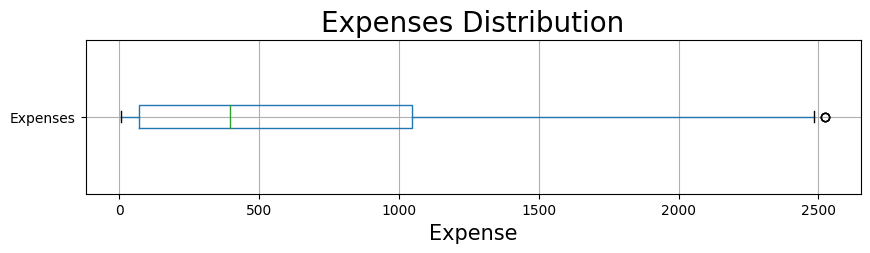

In [ ]:
plt.figure(figsize=(10, 2))
df.boxplot(column='Expenses', vert=False)
plt.title('Expenses Distribution', fontsize=20)
plt.xlabel('Expense', fontsize=15)
plt.show()

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Expenses'],
      dtype='object')

Combine  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'

In [ ]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [ ]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,0,1617,0


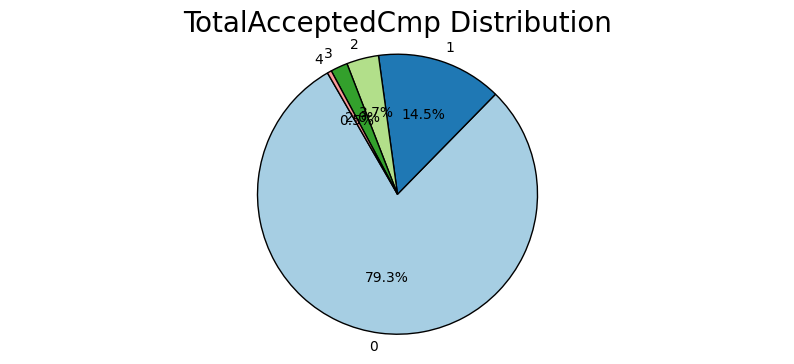

In [ ]:
plt.figure(figsize =  (10,4))
df['TotalAcceptedCmp'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%',startangle = 120,
                               colors = plt.cm.Paired.colors, wedgeprops = {'edgecolor':'black'})

plt.title('TotalAcceptedCmp Distribution',fontsize = 20)
plt.ylabel('')
plt.axis('equal')
plt.show()

In [ ]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,0,1617,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Expenses',
       'TotalAcceptedCmp'],
      dtype='object')

In [ ]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].value_counts()

,count
NumTotalPurchases,
7,149
5,145
4,128
6,123
17,116
9,102
19,101
16,101
21,95


In [ ]:
df['NumTotalPurchases'].describe()

,NumTotalPurchases
count,2240.000000
mean,14.862054
std,7.677173
min,0.000000
25%,8.000000
50%,15.000000
75%,21.000000
max,44.000000


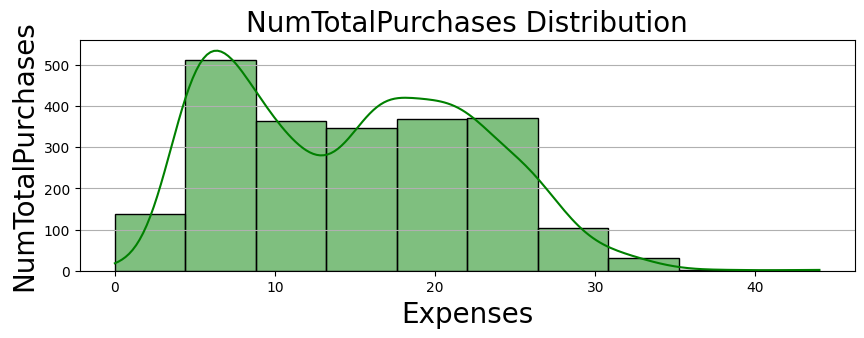

In [ ]:
plt.figure(figsize = (10,3))
sns.histplot(df['NumTotalPurchases'],bins = 10,color = 'green',edgecolor = 'black',kde=True)
plt.title('NumTotalPurchases Distribution',fontsize = 20)
plt.xlabel('Expenses',fontsize = 20)
plt.ylabel('NumTotalPurchases',fontsize =  20)
plt.grid(axis = 'y')
plt.show()

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

Remove un une cols

In [ ]:
col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]


In [ ]:
df = df.drop(columns=col_del,axis=1)

In [ ]:
#re structured Data Frame
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,1957,Graduation,Single,58138.0,04-09-2012,58,0,1,0,1617,0,25
1,1954,Graduation,Single,46344.0,08-03-2014,38,0,0,2,27,0,6
2,1965,Graduation,Together,71613.0,21-08-2013,26,0,0,0,776,0,21
3,1984,Graduation,Together,26646.0,10-02-2014,26,0,0,1,53,0,8
4,1981,PhD,Married,58293.0,19-01-2014,94,0,0,1,422,0,19


In [ ]:
df.shape

(2240, 12)

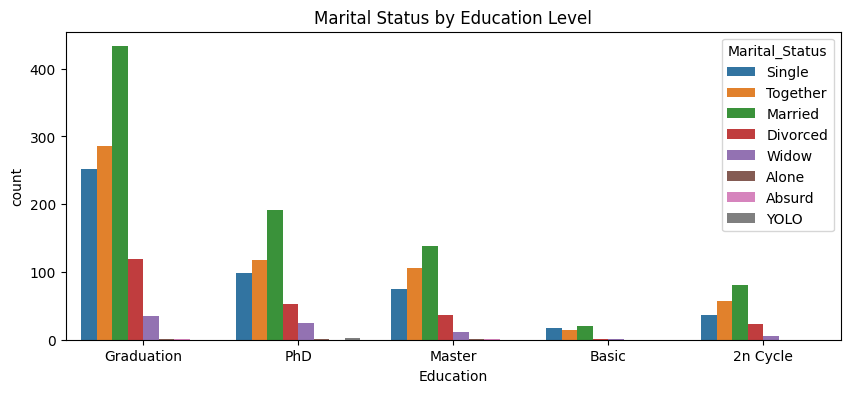

In [ ]:
# Bar Plot: Education vs Marital_Status
plt.figure(figsize=(10, 4))
sns.countplot(x='Education', hue='Marital_Status', data=df)
plt.title('Marital Status by Education Level')
plt.show()

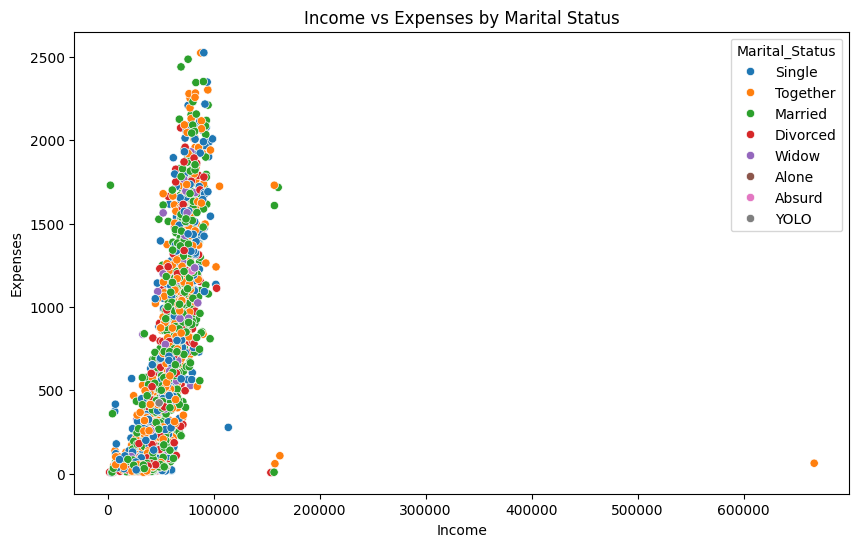

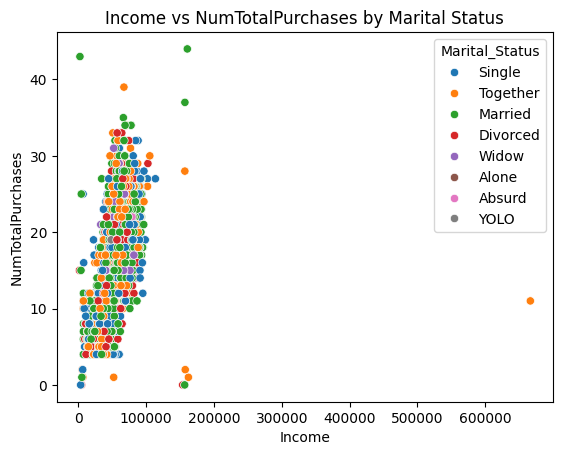

In [ ]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = df, x = 'Income', y = 'Expenses', hue = 'Marital_Status')
plt.title('Income vs Expenses by Marital Status')
plt.show()

sns.scatterplot(data = df,x = 'Income',y = 'NumTotalPurchases',hue = 'Marital_Status')
plt.title('Income vs NumTotalPurchases by Marital Status')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2240 non-null   float64
 4   Dt_Customer        2240 non-null   object 
 5   Recency            2240 non-null   int64  
 6   Complain           2240 non-null   int64  
 7   Response           2240 non-null   int64  
 8   Kids               2240 non-null   int64  
 9   Expenses           2240 non-null   int64  
 10  TotalAcceptedCmp   2240 non-null   int64  
 11  NumTotalPurchases  2240 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 210.1+ KB


In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,1957,Graduation,Single,58138.0,04-09-2012,58,0,1,0,1617,0,25
1,1954,Graduation,Single,46344.0,08-03-2014,38,0,0,2,27,0,6
2,1965,Graduation,Together,71613.0,21-08-2013,26,0,0,0,776,0,21
3,1984,Graduation,Together,26646.0,10-02-2014,26,0,0,1,53,0,8
4,1981,PhD,Married,58293.0,19-01-2014,94,0,0,1,422,0,19


In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
a = df['Income']

In [ ]:
b = df['Expenses']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(a,b,test_size = 0.25,random_state = 0)

In [ ]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [ ]:
lr = LinearRegression()

In [ ]:
y_pred = lr.fit(x_train,y_train)

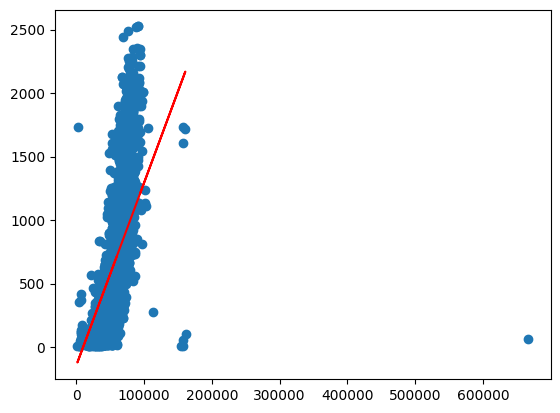

In [ ]:
plt.scatter(df['Income'],df['Expenses'])
plt.plot(x_test,lr.predict(x_test),color = 'red')
plt.show()

In [ ]:
lr.coef_

array([0.01439124])

In [ ]:
lr.intercept_

-145.8554531320658

In [ ]:
mean_squared_error(y_test,lr.predict(x_test))

153210.5955318431

In [ ]:
mean_absolute_error(y_test,lr.predict(x_test))

305.0489997686549

In [ ]:
a_sc = sc.fit_transform(a.values.reshape(-1,1))
b_sc = sc.fit_transform(b.values.reshape(-1,1))

In [ ]:
a_sc.shape

(2240, 1)

In [ ]:
b_sc.shape

(2240, 1)

In [ ]:
l = LinearRegression()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(a_sc,b_sc,test_size = 0.25,random_state = 0)

In [ ]:
y_pre = l.fit(x_train,y_train)

In [ ]:
a = sc.fit_transform(a.values.reshape(-1,1))

In [ ]:
a

array([[ 0.23532677],
       [-0.23582624],
       [ 0.77363327],
       ...,
       [ 0.18910632],
       [ 0.67903514],
       [ 0.02483795]])

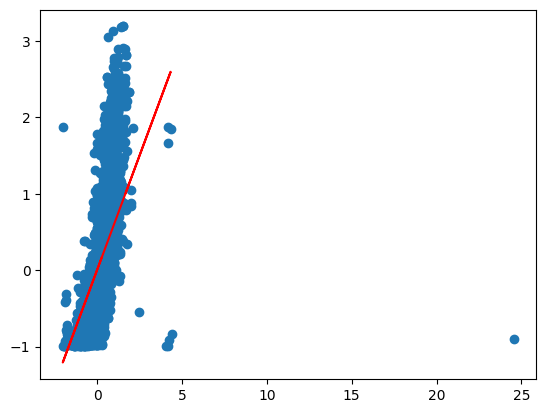

In [ ]:
plt.scatter(a_sc,b_sc)
plt.plot(x_test,l.predict(x_test),color = 'red')
plt.show()

In [ ]:
 l.coef_

array([[0.59829872]])

In [ ]:
l.intercept_

array([0.00041375])

**Keams**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters = 3,init = 'k-means++',random_state = 42)

In [ ]:
x = df.iloc[:, [3, 11]].values

In [ ]:
x

array([[5.8138e+04, 2.5000e+01],
       [4.6344e+04, 6.0000e+00],
       [7.1613e+04, 2.1000e+01],
       ...,
       [5.6981e+04, 1.9000e+01],
       [6.9245e+04, 2.3000e+01],
       [5.2869e+04, 1.1000e+01]])

In [ ]:
km

KMeans(n_clusters=3, random_state=42)

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

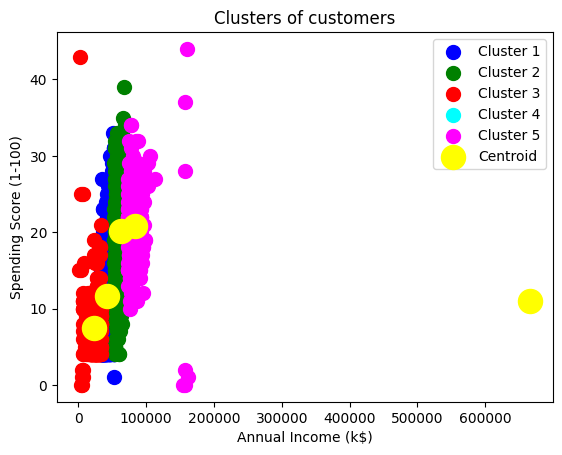

In [ ]:
#visulaizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
x = df.iloc[:,[3,11]].values

In [ ]:
x

array([[5.8138e+04, 2.5000e+01],
       [4.6344e+04, 6.0000e+00],
       [7.1613e+04, 2.1000e+01],
       ...,
       [5.6981e+04, 1.9000e+01],
       [6.9245e+04, 2.3000e+01],
       [5.2869e+04, 1.1000e+01]])

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

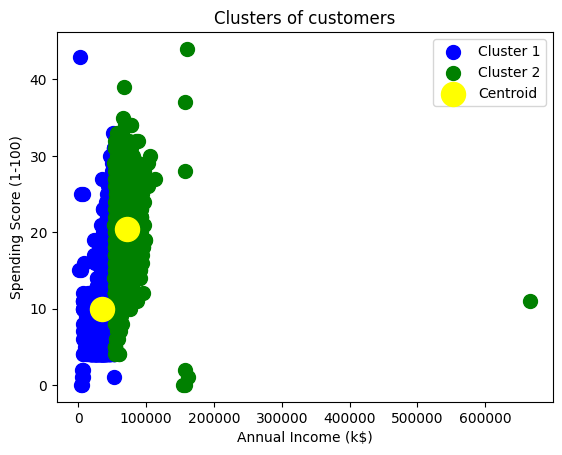

In [ ]:
#visulaizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
#plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
#plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
#plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

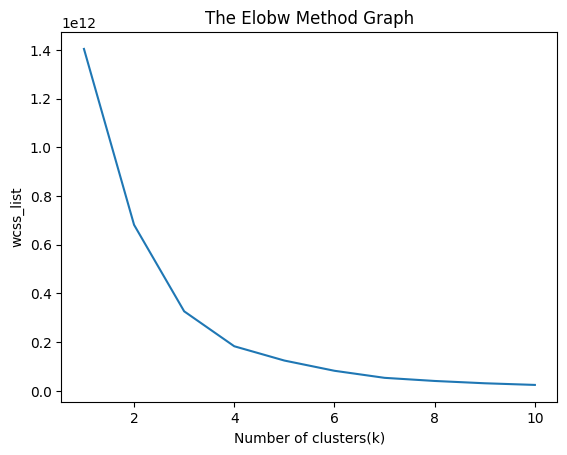

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

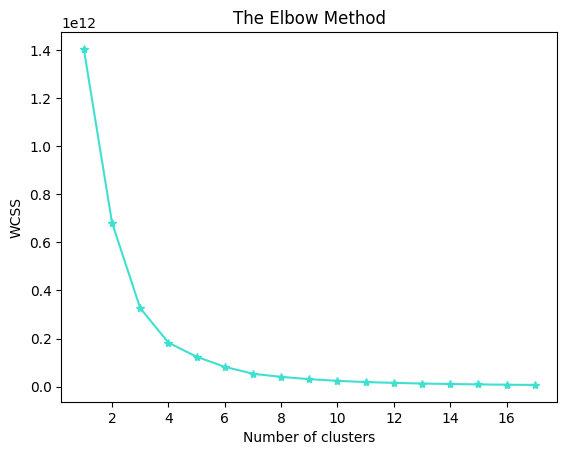

In [ ]:
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

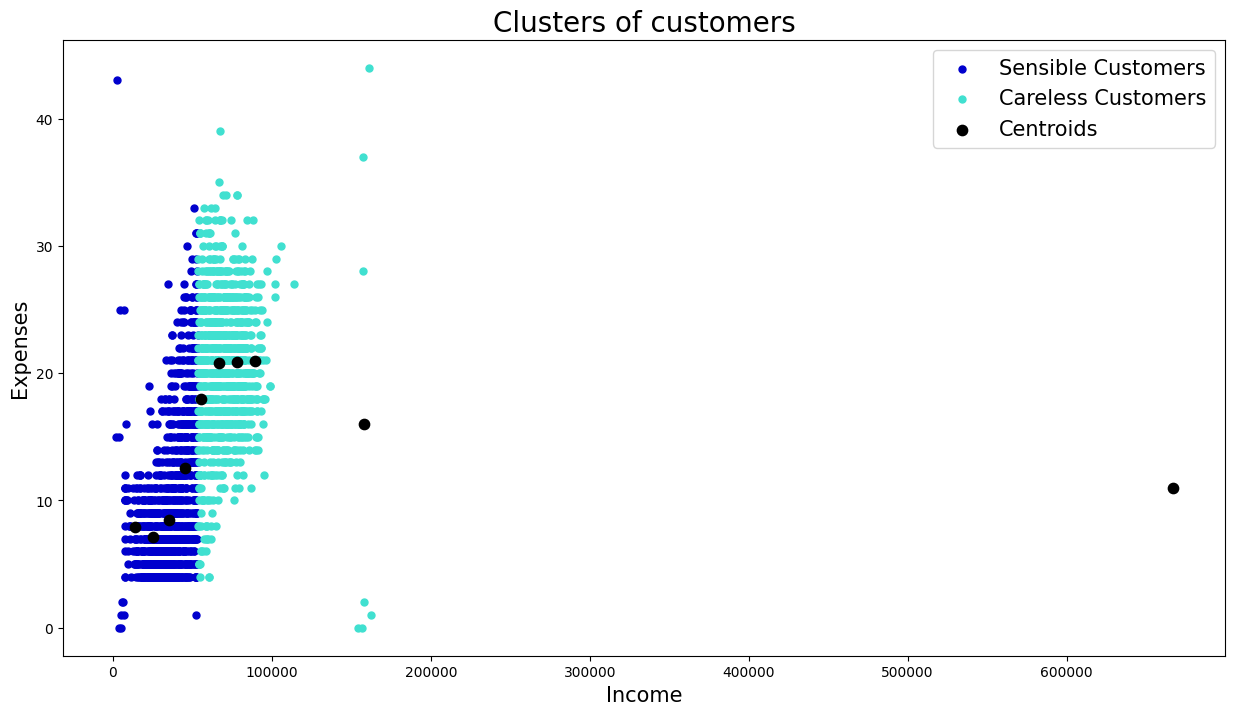

In [ ]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()